#                                       Portfolio Optimization & Monte Carlo Simulation

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
%matplotlib inline
import yfinance as yf

## Create and Analyse Your Desired Portfolio

#### Enter list of stocks

In [27]:
user_portfolio = []
#imput_tickers = input("Enter ticker symbols separated by a comma:") or ("MSFT,AAPL,AMZN,GOOGL,V")
imput_tickers = "MSFT,AAPL,AMZN,GOOGL,V"
user_portfolio.extend(map(str, imput_tickers.split(",")))
print(user_portfolio)
type(user_portfolio)

['MSFT', 'AAPL', 'AMZN', 'GOOGL', 'V']


list

#### Enter desired weight distribution for selected stocks

In [28]:
p_weights = []
# imput_weight = input() or ('0.2,0.2,0.2,0.2,0.2')
imput_weight ="0.2,0.2,0.2,0.2,0.2"
p_weights.extend(map(float, imput_weight.split(",")))
print(p_weights)
print(f'Sum of weights=:{sum(p_weights)}')

[0.2, 0.2, 0.2, 0.2, 0.2]
Sum of weights=:1.0


#### Select desired benchmark to simulate results

In [29]:
# imput_bm = input("Enter benchmark symbol:") or ("SPY")
imput_bm ="SPY"
benchmark = imput_bm.split(',')
print(benchmark)
type(benchmark)

['SPY']


list

#### Define number of simulations & number of periods per simulation

In [30]:
number_simulations = 500
number_records =252*8 #252 trading days * no of years

## Import Data

In [31]:
# Datasource Yahoo Finance

list_of_tickers=benchmark+user_portfolio

data = yf.download(
        tickers = list_of_tickers,
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        period = "30y",
        interval = "1d",
        group_by = 'ticker',
        # adjust all OHLC automatically, adjusted for stock splits
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )
data.tail()

[*********************100%***********************]  6 of 6 completed


GOOGL                                                    \
                   Open         High          Low        Close     Volume   
Date                                                                        
2020-05-11  1376.790039  1415.530029  1375.500000  1403.589966  1633700.0   
2020-05-12  1408.219971  1414.329956  1374.510010  1375.180054  1695900.0   
2020-05-13  1376.160034  1385.329956  1328.010010  1348.329956  2018400.0   
2020-05-14  1333.520020  1357.369995  1323.300049  1356.859985  1833000.0   
2020-05-15  1348.260010  1374.579956  1339.000000  1373.060059  2075000.0   

                   AMZN                                                    \
                   Open         High          Low        Close     Volume   
Date                                                                        
2020-05-11  2374.699951  2419.669922  2372.110107  2409.000000  3253700.0   
2020-05-12  2411.850098  2419.000000  2355.000000  2356.949951  3074900.0   
2020-05-13  2366.800049  2407.699951  2337.800049  2367.919922  4782900.0   
2020-05-14  2361.010010  2391.370117  2353.209961  2388.850098  3648100.0   
2020-05-15  2368.520020  2411.000000  2356.370117  2409.780029  4227500.0   

            ...        MSFT                                                \
            ...        Open        High         Low       Close    Volume   
Date        ...                                                             
2020-05-11  ...  183.149994  187.509995  182.850006  186.740005  30809400   
2020-05-12  ...  186.800003  187.039993  182.300003  182.509995  32038200   
2020-05-13  ...  182.550003  184.050003  176.539993  179.750000  44711500   
2020-05-14  ...  177.539993  180.690002  175.679993  180.529999  41873900   
2020-05-15  ...  179.059998  187.059998  177.000000  183.160004  46597900   

                  AAPL                                                
                  Open        High         Low       Close    Volume  
Date                                                                  
2020-05-11  308.100006  317.049988  307.239990  315.010010  36405900  
2020-05-12  317.829987  319.690002  310.910004  311.410004  40575300  
2020-05-13  312.149994  315.950012  303.209991  307.649994  50155600  
2020-05-14  304.510010  309.790009  301.529999  309.540009  39732300  
2020-05-15  300.350006  307.899994  300.209991  307.709991  41561200  

[5 rows x 30 columns]

## Data cleanup

In [32]:
# Historic adjusted close prices
df_yf = data.sort_index()
df_yf.drop(columns=['Open', 'High', 'Low', 'Volume'], level=1, inplace=True)
df_yf = df_yf.droplevel(axis=1, level=1)
df_yf.index = df_yf.index.date
df_yf.dropna(inplace=True)
df_yf.hvplot(title ="Historic Stocks & Benchmark Performance")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [33]:
# Isolate cleaned data
user_portfolio_df=df_yf.drop([benchmark[0]], axis =1)
bm_portfolio_df=df_yf[benchmark[0]]

# Calculate daily returns
user_portfolio_returns = user_portfolio_df.pct_change().dropna()
bm_portfolio_returns = bm_portfolio_df.pct_change().dropna()

In [34]:
bm_portfolio_returns.hvplot(title ="Benchmark historic returns")

:Curve   [index]   (SPY)

In [35]:
user_portfolio_returns.hvplot(title ="Stocks historic returns")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

## Define variables for Benchmark Monte Carlo simulation

In [36]:
bm_portfolio_ret_mean = bm_portfolio_returns.mean()
bm_portfolio_ret_std = bm_portfolio_returns.std()
bm_last_price = bm_portfolio_df[-1]

#TODO provide clear message to user, round to two decimal points
#we might want to illustrate what standard deviation means
print(f'Your portfolio average historical returns for the BM is:{bm_portfolio_ret_mean}')
print(f'Your portfolio standard deviation for the BM is:{bm_portfolio_ret_std}')
print(f'The present value of your benchmark is:{bm_last_price}')

Your portfolio average historical returns for the BM is:0.00042723164445259353
Your portfolio standard deviation for the BM is:0.013228802500195777
The present value of your benchmark is:286.2799987792969


### Run BM Monte Carlo Simulation

In [37]:
simulated_price_df = pd.DataFrame()
bm_montecarlo_returns = pd.DataFrame()

for n in range(number_simulations):
    simulated_benchmark_prices = [bm_last_price]
    for i in range(number_records):
        simulated_benchmark_price = simulated_benchmark_prices[-1] * (1 + np.random.normal(bm_portfolio_ret_mean, bm_portfolio_ret_std))
        simulated_benchmark_prices.append(simulated_benchmark_price)
    simulated_price_df["SPY prices"] = pd.Series(simulated_benchmark_prices)
    simulated_daily_returns_bm = simulated_price_df.pct_change()
    b_weights = [1.00] 
    portfolio_daily_returns = simulated_daily_returns_bm.dot(b_weights)
    bm_montecarlo_returns[f'T{n}'] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
bm_montecarlo_returns.head()

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T490,T491,T492,T493,T494,T495,T496,T497,T498,T499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017662,1.010068,1.006782,0.989987,0.988691,1.019965,0.998083,0.997336,1.007919,0.983771,...,1.009462,0.984925,0.992004,1.003411,0.994886,1.008952,0.990487,0.998634,0.997736,1.008844
2,1.018753,1.008304,1.023523,0.992482,0.992850,1.009590,1.004978,0.999994,0.996546,0.995956,...,1.003308,1.005298,0.991621,1.007572,0.998957,1.012189,0.993481,1.005251,1.000135,1.011033
3,1.037928,1.019611,1.031221,1.004839,0.993961,1.026379,0.992382,0.986989,0.994672,0.986383,...,1.006278,1.011602,0.987666,1.043634,0.997818,1.011387,0.978786,0.995332,1.003901,1.024212
4,1.039277,1.027112,1.026883,1.005763,0.998821,1.031297,0.983822,0.997153,0.978658,0.988328,...,1.009783,0.999194,0.980419,1.051055,0.988118,0.995031,1.003415,1.003330,1.008604,1.032391


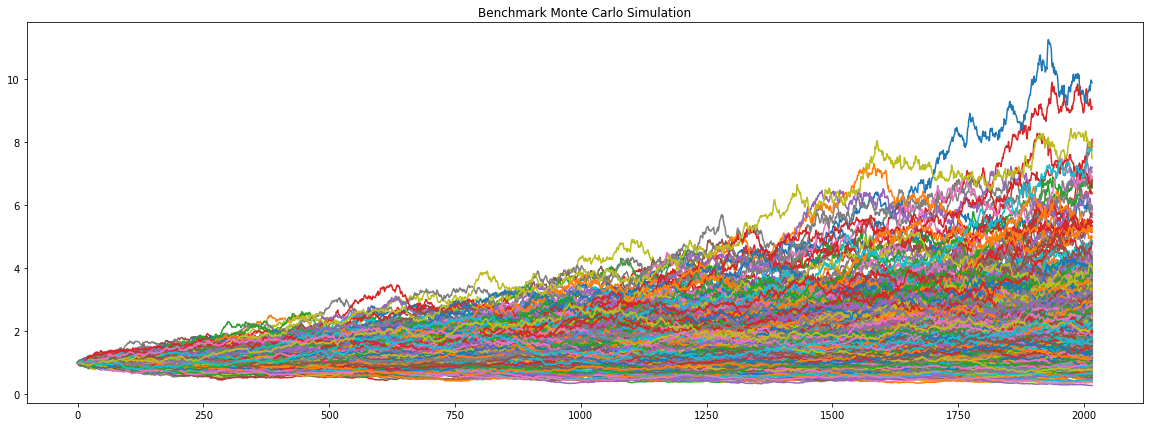

In [38]:
def get_bm_mc_chart():
    bm_mc_chart = bm_montecarlo_returns.plot(
        title="Benchmark Monte Carlo Simulation",
        legend=None, 
        figsize=(20,7)
    )
    return bm_mc_chart
get_bm_mc_chart();

## Define variables for portfolio Monte Carlo simulation

In [39]:
pf_means = {}
pf_std = {}
pf_last_day = {}

for stock in user_portfolio:
    pf_means[stock] = user_portfolio_returns.mean()[stock]
    pf_std[stock] = user_portfolio_returns.std()[stock]
    pf_last_day[stock] = user_portfolio_df[stock][-1]
pd.DataFrame([pf_means,pf_std,pf_last_day])

,MSFT,AAPL,AMZN,GOOGL,V
0,0.000862,0.001160,0.001428,0.000773,0.001102
1,0.018117,0.019700,0.023458,0.018475,0.019369
2,183.160004,307.709991,2409.780029,1373.060059,183.490005


### Run portfolio Monte Carlo Simulation

In [40]:
pf_montecarlo_returns = pd.DataFrame()

for n in range(number_simulations):
    simulated_portfolio_prices = {stock:[pf_last_day[stock]] for stock in user_portfolio}
    for i in range(number_records):
        for stock in user_portfolio:
            simulated_stocks_price = simulated_portfolio_prices[stock][-1] * (1 + np.random.normal(pf_means[stock], pf_std[stock]))
            simulated_portfolio_prices[stock].append(simulated_stocks_price)
    simulated_prices_df = pd.DataFrame(simulated_portfolio_prices)
    simulated_daily_returns = simulated_prices_df.pct_change()
    simulated_daily_returns.dropna(inplace=True)
    portfolio_daily_returns = simulated_daily_returns.dot(p_weights)
    pf_montecarlo_returns[f'T{n}'] = (1+portfolio_daily_returns.fillna(0)).cumprod()
pf_montecarlo_returns.head()

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T490,T491,T492,T493,T494,T495,T496,T497,T498,T499
1,0.988938,0.997376,1.006687,1.003988,0.988561,1.011450,0.998972,1.008777,1.012498,1.001516,...,0.992489,0.991152,1.001081,0.999551,0.995955,1.006041,1.005939,1.000032,0.999861,0.994960
2,0.990363,1.002443,1.000349,1.012568,0.994750,1.010607,0.996842,1.014957,1.024120,0.999221,...,0.980475,0.976651,0.989482,1.002288,0.997264,1.008780,1.010894,1.003200,0.992958,0.987966
3,0.980936,1.001391,0.998113,1.018510,0.983915,0.995434,0.998305,1.011942,1.013065,0.984664,...,0.973685,0.972930,0.984350,0.986624,0.998443,1.014530,0.997131,0.994176,1.000916,0.991887
4,0.982237,1.012180,1.017219,1.027833,0.982655,0.983737,1.007093,1.018056,1.013472,0.978635,...,0.982832,0.964148,0.989953,0.989396,1.006172,1.011794,1.024331,1.002903,0.999271,1.004818
5,0.985833,1.016124,1.015014,1.022816,0.977855,0.984692,1.003676,1.019901,1.001162,0.976528,...,0.983738,0.949544,1.004283,0.993313,1.015013,1.018965,1.027881,1.016691,1.005982,1.004653


In [41]:
def get_pf_mc_chart():
    pf_mc_chart = pf_montecarlo_returns.plot(
        title="Portfolio Monte Carlo Simulation",
        legend=None, 
        figsize=(20,7)
    )
    return pf_mc_chart

## Benchmark & Portfolio Comparison

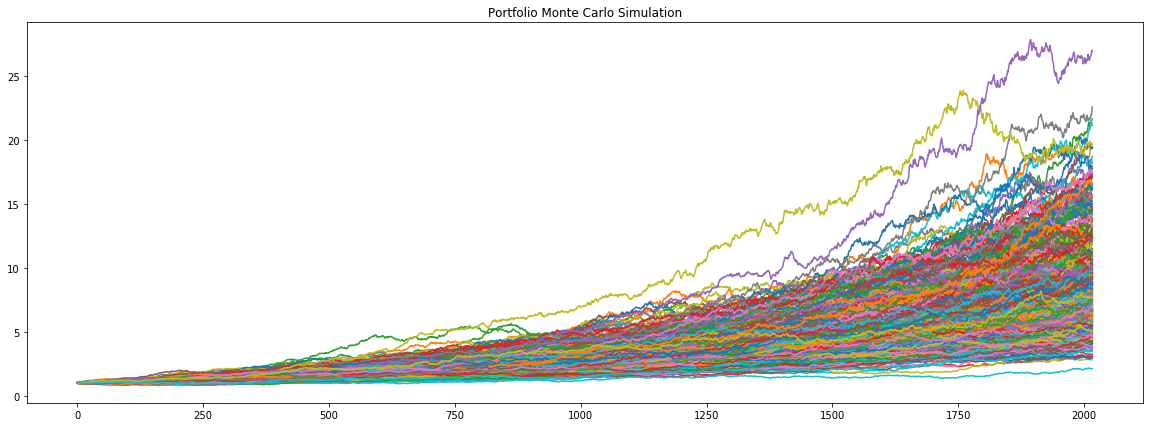

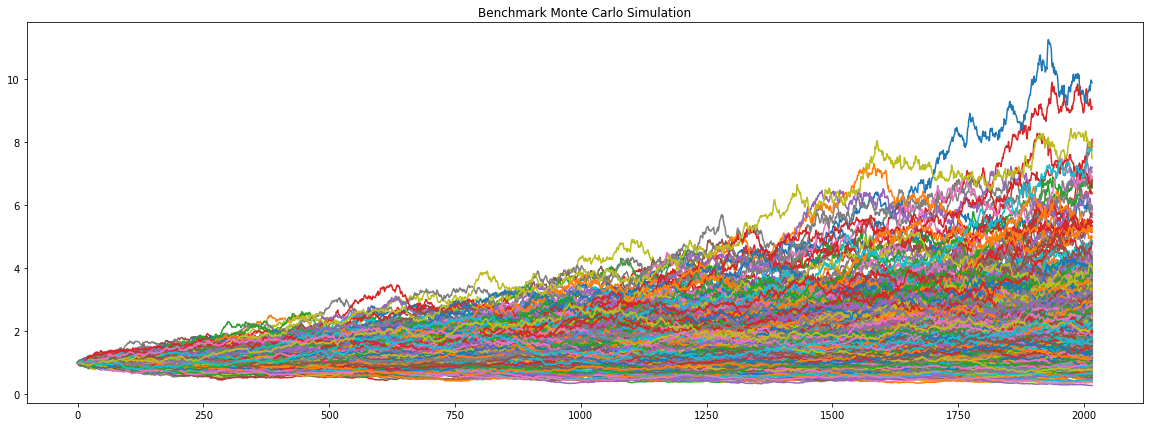

In [42]:
geo_column = pn.Column("### Benchmark & Portfolio Comparison", get_pf_mc_chart(), get_bm_mc_chart())
geo_column;

## Probability Distribution of simulated returns with 90% (Green) 95% (Red) Confidence Intervals

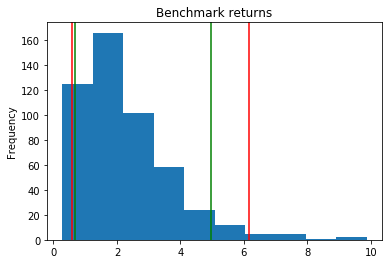

In [43]:
pf_cumulative_ret=pf_montecarlo_returns.iloc[-1, :]
bm_cumulative_ret=bm_montecarlo_returns.iloc[-1, :]
pf_confidence_interval = pf_cumulative_ret.quantile(q=[0.025, 0.975])
bm_confidence_interval = bm_cumulative_ret.quantile(q=[0.025, 0.975])
pf_confidence_interval_2 = pf_cumulative_ret.quantile(q=[0.05, 0.95])
bm_confidence_interval_2 = bm_cumulative_ret.quantile(q=[0.05, 0.95])

def get_pf_hist_chart():
    pf_hist = pf_cumulative_ret.plot(
        kind='hist', 
        bins=10, 
        title="Portofolio returns"
    ) 
    plt.axvline(pf_confidence_interval.iloc[0], color='r')
    plt.axvline(pf_confidence_interval.iloc[1], color='r')
    plt.axvline(pf_confidence_interval_2.iloc[0], color='g')
    plt.axvline(pf_confidence_interval_2.iloc[1], color='g')
    return pf_hist

def get_bm_hist_chart():
    bh_hist = bm_cumulative_ret.plot(
        kind='hist',
        bins=10,
        title="Benchmark returns"
    )
    plt.axvline(bm_confidence_interval.iloc[0], color='r')
    plt.axvline(bm_confidence_interval.iloc[1], color='r')
    plt.axvline(bm_confidence_interval_2.iloc[0], color='g')
    plt.axvline(bm_confidence_interval_2.iloc[1], color='g')
    return bh_hist

get_bm_hist_chart();

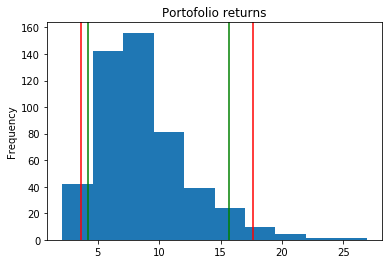

In [44]:
get_pf_hist_chart();